# 임계처리

임계처리(thresholding)는 이미지를 검은색과 흰색으로만 표혀하는 것으로 이진화(binary) 이미지라고 한다. 이미지에서 원하는 피사체의 모양을 좀 더 정확히 판단하기 위해서 사용한다. 예를 들면, 글씨만 분리하거나 배경에서 전경을 분리하는 작업 등이다.

127.0


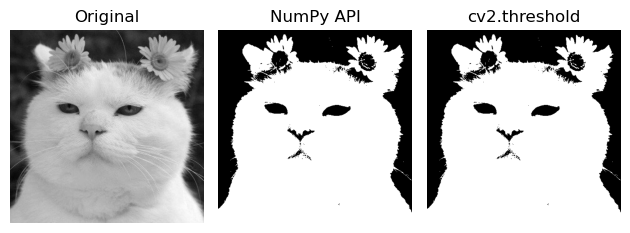

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)

thresh_np = np.zeros_like(image)
thresh_np[image > 127] = 255

ret, thresh_cv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) 
print(ret)

images = {
    'Original': image, 'NumPy API': thresh_np, 'cv2.threshold': thresh_cv
}

plt.figure(dpi=100)
for i , (key, value) in enumerate(images.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

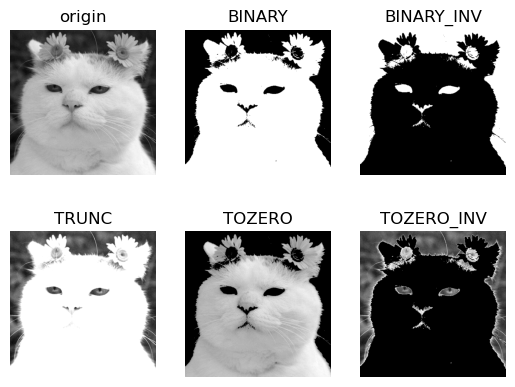

In [7]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

images = {
    'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv,
    'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv
}

for i, (key, value) in enumerate(images.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')
    
plt.show()

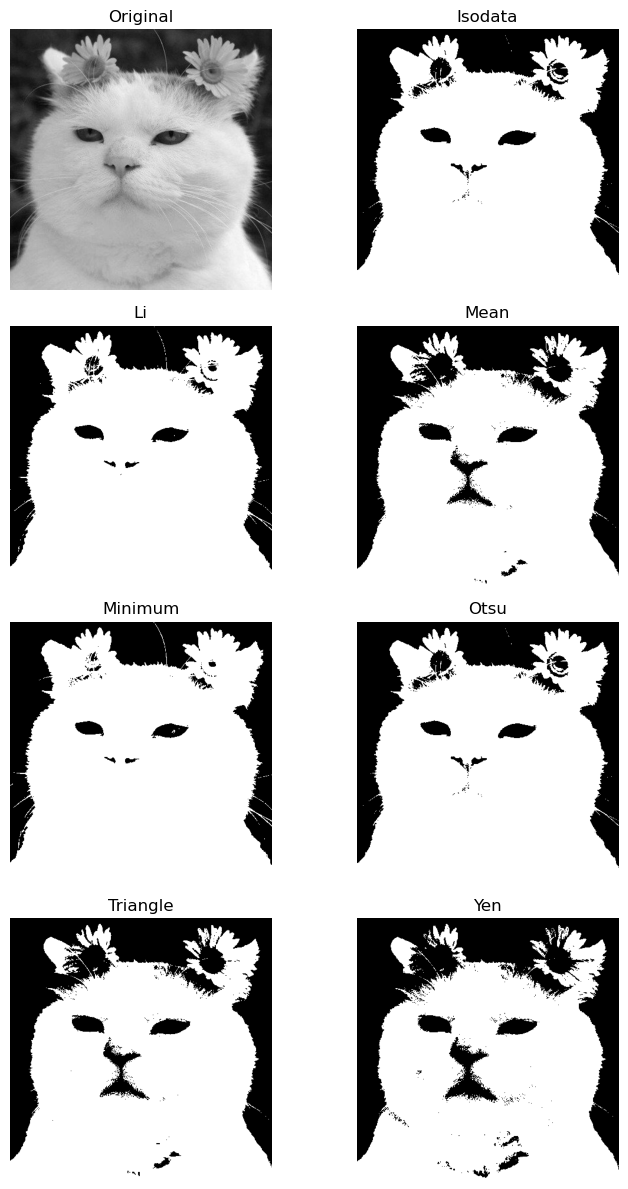

In [18]:
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

image = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)
fig, axes = try_all_threshold(image, figsize=(10, 12), verbose=False)
fig.tight_layout()
plt.show()

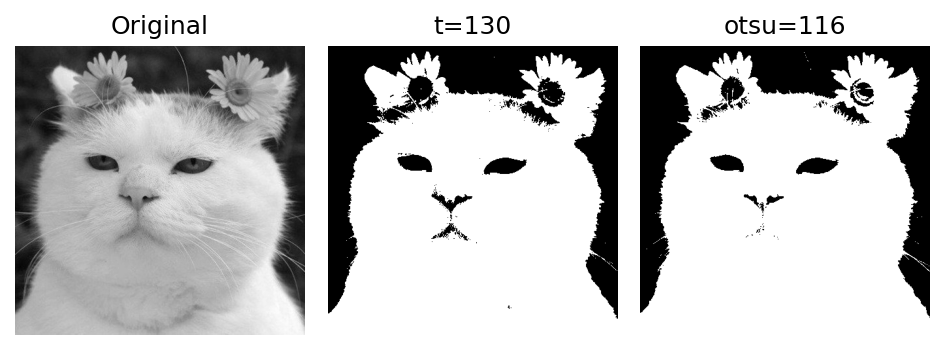

In [27]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE) 
_, t_130 = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)        
t, t_otsu = cv2.threshold(image, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 

imgs = {'Original': img, 't=130':t_130, 'otsu=%d'%t: t_otsu}
plt.figure(dpi=150)
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 오츠 알고리즘

바이너리 이미지를 만들 때 중요한 작업은 경계 값을 어떻게 정의할 것인가? 적절한 경계 값을 찾는 방법은 매우 어렵다. 1979년 오츠 노부유키는 반복적인 시도 없이 한 번에 경계 값을 찾을 수 있는 방법을 제안했다. 오츠의 이진화 알고리즘(Otsu's binarization algorithm)이라고 한다. 오츠의 알고리즘은 경계값을 임의로 정해 픽셀들을 두 부류로 나누고 두 부류의 명암 분포를 반복해서 구한 다음 명암 분포를 가장 균일하게 하는 경계 값을 선택한다.

$$\sigma_{w}^{2}(t)=w_{1}(t)\sigma_{1}^{2}(t)+w_{2}(t)\sigma_{2}^{2}(t)$$

* $t$: 0-255, 경계값
* $w_{1}, w_{2}$: 각 부류의 비율 가중치
* $\sigma_{1}^{2},\sigma_{2}^{2}$: 각 부류의 분산

117


<ipython-input-43-3a4416b54896>:15: RuntimeWarning: invalid value encountered in true_divide
  mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
<ipython-input-43-3a4416b54896>:16: RuntimeWarning: invalid value encountered in true_divide
  muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)


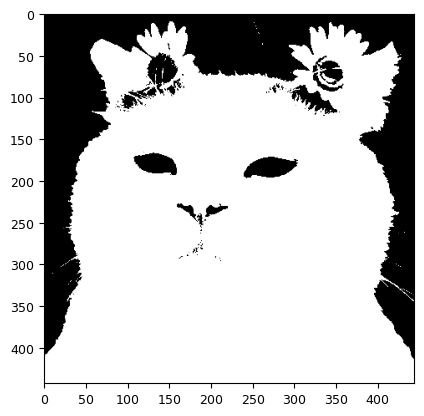

In [43]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

img = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(otsu(img), cmap='gray')
plt.show()

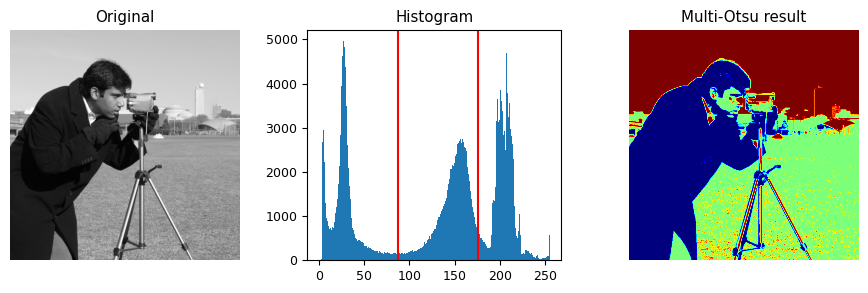

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu

matplotlib.rcParams['font.size'] = 9
image = data.camera()

thresholds = threshold_multiotsu(image)

regions = np.digitize(image, bins=thresholds)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].hist(image.ravel(), bins=255)
axes[1].set_title('Histogram')
for thresh in thresholds:
    axes[1].axvline(thresh, color='r')

axes[2].imshow(regions, cmap='jet')
axes[2].set_title('Multi-Otsu result')
axes[2].axis('off')

fig.tight_layout()
plt.show()

## 적응형 임계처리

이미지 전역을 임계처리하는 것이 아닌 이미지를 여러 영역으로 나눈 다음 그 주변 픽셀 값만 가지고 계산해 경계 값을 구하는 것을 적응형 임계처리(adaptive threshold)이다.

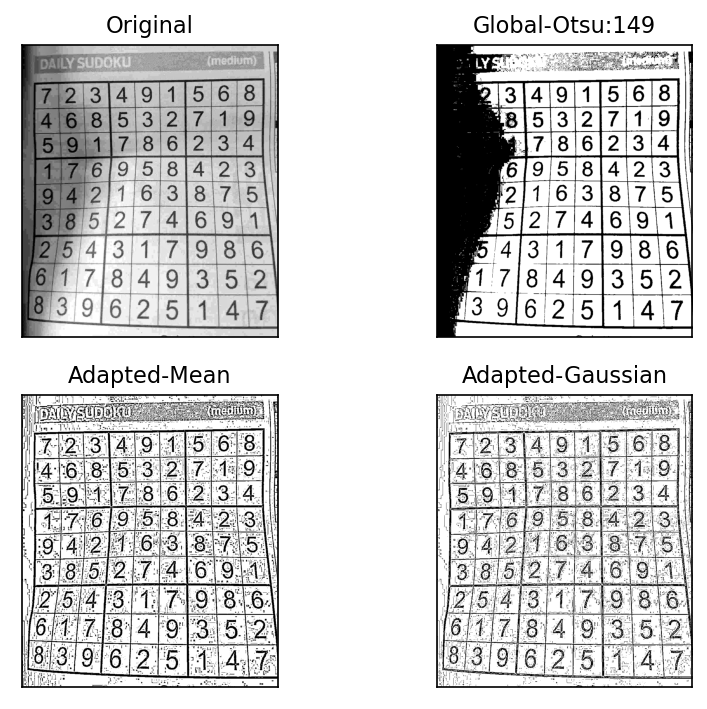

In [48]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9
C = 5
image = cv2.imread('./img/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(
    image, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY,
    blk_size, 
    C
)
th3 = cv2.adaptiveThreshold(
    image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blk_size,
    C
)

images = {
    'Original': img, 'Global-Otsu:%d'%ret:th1,
    'Adapted-Mean':th2, 'Adapted-Gaussian': th3
}

plt.figure(dpi=150)
for i, (k, v) in enumerate(images.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()

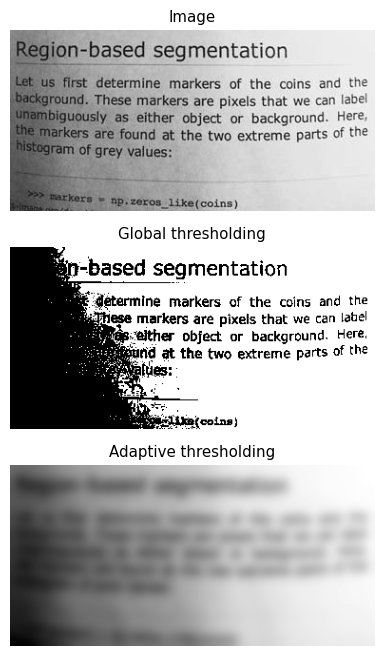

In [52]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage import filters


image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
binary_adaptive = filters.threshold_local(image, block_size, offset=10)

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(binary_global)
ax1.set_title('Global thresholding')

ax2.imshow(binary_adaptive)
ax2.set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()